In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

In [2]:
import plotly.figure_factory as plt
import plotly.graph_objects as go
import plotly.express as px

## Reading the data

In [3]:
data = pd.read_csv(r'C:\Users\Lenovo\Desktop\Data\in-vehicle-coupon-recommendation.csv')

## Data Preprocessing 

In [4]:
data.shape

(12684, 26)

In [5]:
data.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [6]:
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [7]:
data.shape

(12684, 26)

In [8]:
data['car'].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

Dropping the car column in which 90% of the values is missing

In [9]:
data = data.drop(['car'],axis=1)

Replacing the null values in the Bar column with mode

In [10]:
data['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

In [11]:
data['Bar'] = data['Bar'].fillna(data['Bar'].mode()[0])

In [12]:
data['Bar'].isna().sum()

0

Replacing the null values in CoffeeHouse column with mode

In [13]:
data['CoffeeHouse'].dtype

dtype('O')

In [14]:
data['CoffeeHouse'].unique()

array(['never', 'less1', '4~8', '1~3', 'gt8', nan], dtype=object)

In [15]:
data['CoffeeHouse'] = data['CoffeeHouse'].fillna(data['CoffeeHouse'].mode()[0])

In [16]:
data['CoffeeHouse'].isna().sum()

0

Replacing the missing values in the column CarryAway with mode

In [17]:
data['CarryAway'] = data['CarryAway'].fillna(data['CarryAway'].mode()[0])
data['CarryAway'].isna().sum()

0

Replacing the missing values in the column RestaurantLessThan20 with mode

In [18]:
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].mode()[0])
data['RestaurantLessThan20'].isna().sum()

0

Replacing the missing values in the column Restaurant20To50 with mode

In [19]:
data['Restaurant20To50'] = data['Restaurant20To50'].fillna(data['Restaurant20To50'].mode()[0])
data['Restaurant20To50'].isna().sum()

0

In [20]:
data.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [21]:
data.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [22]:
#pp.ProfileReport(data)

Dropping duplicate data

In [23]:
data = data.drop_duplicates()

In [24]:
data.shape

(12610, 25)

Replacing some values to numeric and changing data types to integer

In [25]:
data['age'].value_counts()

21         2642
26         2548
31         2019
50plus     1781
36         1317
41         1089
46          670
below21     544
Name: age, dtype: int64

In [26]:
age_dic = {'50plus':55,'below21':18}

In [27]:
data['age'].replace(age_dic,inplace=True)

In [28]:
data['age'].value_counts()

21    2642
26    2548
31    2019
55    1781
36    1317
41    1089
46     670
18     544
Name: age, dtype: int64

In [29]:
data['age'] = data['age'].astype(int)

In [30]:
data.income.unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [31]:
data.income.value_counts()

$25000 - $37499     2006
$12500 - $24999     1825
$37500 - $49999     1795
$100000 or More     1717
$50000 - $62499     1655
Less than $12500    1034
$87500 - $99999      879
$75000 - $87499      856
$62500 - $74999      843
Name: income, dtype: int64

Replacing income values with mid values of income range

In [32]:
income_dic = {'$25000 - $37499':31249.5,'$12500 - $24999':18749.5,'$37500 - $49999':43749.5,'$100000 or More':110000,'$50000 - $62499':56249.5,'Less than $12500':11000,'$87500 - $99999':93749.5,'$75000 - $87499':81249.5,'$62500 - $74999':68749.5}

In [33]:
data['income'].replace(income_dic,inplace=True)
data['income']

0        43749.5
1        43749.5
2        43749.5
3        43749.5
4        43749.5
          ...   
12679    81249.5
12680    81249.5
12681    81249.5
12682    81249.5
12683    81249.5
Name: income, Length: 12610, dtype: float64

In [34]:
data.dtypes

destination              object
passanger                object
weather                  object
temperature               int64
time                     object
coupon                   object
expiration               object
gender                   object
age                       int32
maritalStatus            object
has_children              int64
education                object
occupation               object
income                  float64
Bar                      object
CoffeeHouse              object
CarryAway                object
RestaurantLessThan20     object
Restaurant20To50         object
toCoupon_GEQ5min          int64
toCoupon_GEQ15min         int64
toCoupon_GEQ25min         int64
direction_same            int64
direction_opp             int64
Y                         int64
dtype: object

In [35]:
import re

Extracting digits and texts from the time column

In [36]:
def find_number(text):
    num = re.findall(r'[0-9]+',text)
    return " ".join(num)

In [37]:
data['time_num'] = data['time'].apply(lambda x:find_number(x))
data['time_num']

0         2
1        10
2        10
3         2
4         2
         ..
12679     6
12680     7
12681     7
12682     7
12683     7
Name: time_num, Length: 12610, dtype: object

In [38]:
data['time'].str.lstrip()

0         2PM
1        10AM
2        10AM
3         2PM
4         2PM
         ... 
12679     6PM
12680     7AM
12681     7AM
12682     7AM
12683     7AM
Name: time, Length: 12610, dtype: object

In [39]:
data['time_ltr'] = data['time'].str.replace('\d+', '')

Mapping AM to Morning and PM to Afternoon

In [40]:
data['time_ltr'].unique()

array(['PM', 'AM'], dtype=object)

In [41]:
time_dic = {'PM':'Afternoon','AM':'Morning'}

In [42]:
data['time_ltr'] = data['time_ltr'].map(time_dic)

In [43]:
data['time_ltr']

0        Afternoon
1          Morning
2          Morning
3        Afternoon
4        Afternoon
           ...    
12679    Afternoon
12680      Morning
12681      Morning
12682      Morning
12683      Morning
Name: time_ltr, Length: 12610, dtype: object

In [44]:
data.dtypes


destination              object
passanger                object
weather                  object
temperature               int64
time                     object
coupon                   object
expiration               object
gender                   object
age                       int32
maritalStatus            object
has_children              int64
education                object
occupation               object
income                  float64
Bar                      object
CoffeeHouse              object
CarryAway                object
RestaurantLessThan20     object
Restaurant20To50         object
toCoupon_GEQ5min          int64
toCoupon_GEQ15min         int64
toCoupon_GEQ25min         int64
direction_same            int64
direction_opp             int64
Y                         int64
time_num                 object
time_ltr                 object
dtype: object

# Deriving insights from data

## From where most coupon is given and how much of them are accepted

In [45]:
data.coupon.value_counts()

Coffee House             3989
Restaurant(<20)          2779
Carry out & Take away    2344
Bar                      2010
Restaurant(20-50)        1488
Name: coupon, dtype: int64

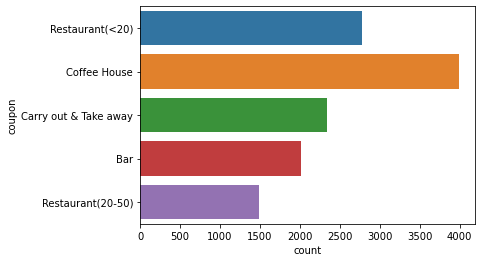

In [51]:
ax = sns.countplot(y='coupon',data=data)

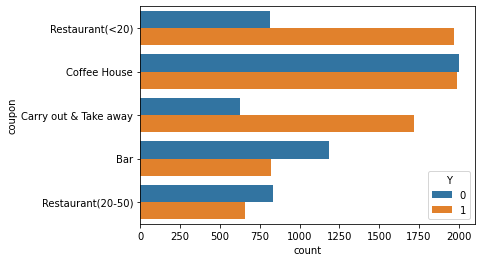

In [50]:
ax = sns.countplot(y='coupon',hue='Y',data=data)

Most of the coupon are given from the Coffee House and fifty percent of them are accepted only

Restuarants with an average expense per person of less than 20$ every month gives out coupons less than Coffee Houses but from these restaurants around 90 percent of them are accepted

Carry out& take away gives around 2500 coupons and there also 90 percent of them are accepted

From Bar most coupons are not likely to beaccepted by the customers

For Restaurants with an average expense per person of more than 20$ most coupons are not accepted



## Customer to which destination accepts the coupon mostly?

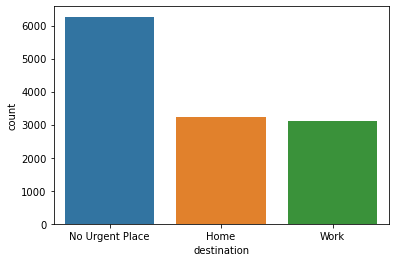

In [58]:
ax =sns.countplot(x='destination',data=data)

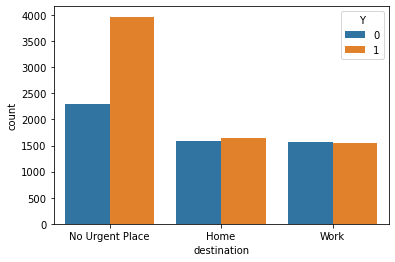

In [56]:
ax = sns.countplot(x='destination',hue='Y',data=data)

Customer with destination as no urgent place are likely to accept the most coupons

In [59]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y', 'time_num', 'time_ltr'],
      dtype='object')

## Which weather condition suits more for customers accepting the coupons

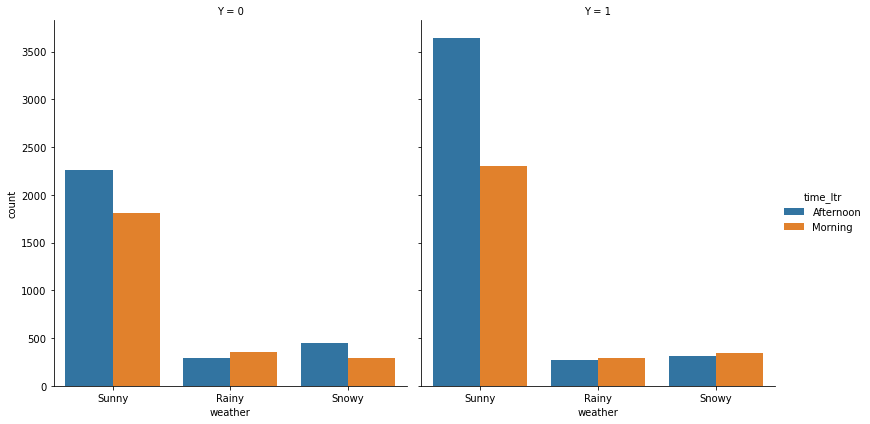

In [68]:
g = sns.catplot(x="weather", hue="time_ltr", col="Y",
                data=data, kind="count",
                height=6, aspect=.9);

At Sunny weather customers are likely to accept more coupons in the afternoon , and for snowy weather at Morning

For rainy weather coupons are accepted mostly in Morning

And for Snowy weather customers tend not to accept coupons at afternoon

And for Rainy weather customers tend not to accept coupons in the morning


## Does the coupons with maximum expiration time are accepted by the customers?

In [78]:
exp_1d=data[data['expiration']=='1d']

In [82]:
exp_1d['Y'].value_counts()

1    4390
0    2641
Name: Y, dtype: int64

In [83]:
exp_2h = data[data['expiration']=='2h']

In [84]:
exp_2h['Y'].value_counts()

0    2812
1    2767
Name: Y, dtype: int64

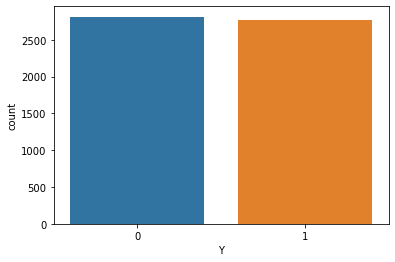

In [85]:
ax = sns.countplot(x='Y',data=exp_2h)

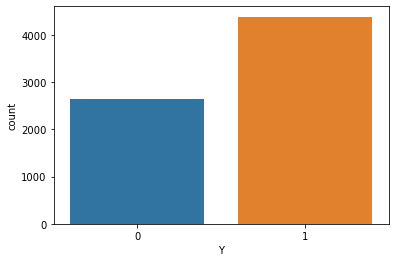

In [86]:
ax = sns.countplot(x='Y',data=exp_1d)

Coupons with one day expiration time are accepted by the customers mostly